**SPAM EMAIL DETECTION** :


1. Read dataset and make it in proper format. 

2. Encode labels

3. Convert all cases to lower

4. Remove punctuations

5. Remove Stopwords

6. Convert all texts into vectors

7. Import classifier

8. Train and test split

9. Check the accuracy/confusion matrix and classification report.



In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

# Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv("SPAM_text_message.csv",encoding='latin-1')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
#Checking the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (5572, 2)


In [6]:
#Checking for the null values
df.isnull().values.any()

False

In [7]:
#Checking total number of mails
print("Count of label:\n",df['Category'].value_counts())

Count of label:
 ham     4825
spam     747
Name: Category, dtype: int64


In [8]:
#Creating the new column for length of message column
df['length'] = df.Message.str.len()
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
#Converting all messages to lower case
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [10]:
# DATA PREPROCESSING

# Tokenization
# Tokenization simply splits the message into individual tokens.

from textblob import TextBlob

def tokenize(Message):
    message = (Message, 'utf8')
    return TextBlob(Message).words

In [11]:
# Original messages to be tokenized.
df['Message'].head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [12]:
# Tokenized messages.
df['Message'].head().apply(tokenize)

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, do, n't, think, he, goes, to, usf, he...
Name: Message, dtype: object

In [13]:
# Lemmatization
# Convert each word in a message to its base form (lemma).

from textblob import TextBlob

def lemmatize(Message):
    message = Message.lower()
    return [word.lemma for word in TextBlob(message).words]


In [14]:
# Original messages to be Lemmatized.

df['Message'].head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [15]:
# Lemmatized messages.

df['Message'].head().apply(lemmatize)

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, do, n't, think, he, go, to, usf, he, ...
Name: Message, dtype: object

In [16]:
# Vectorization
# Count Vectorization - Count Vectorization obtains frequency of unique words in each tokenized message.

from sklearn.feature_extraction.text import CountVectorizer

"""Bag of Words Transformer using lemmatization"""

bow_transformer = CountVectorizer(analyzer=lemmatize)
bow_transformer.fit(df['Message'])

CountVectorizer(analyzer=<function lemmatize at 0x000002246E7EE670>)

In [17]:
#  Trying out the Bag of Words transformer on some dummy message.

dummy_vectorized = bow_transformer.transform(['Hey you... you of the you... This message is to you.'])
print (dummy_vectorized)

  (0, 3882)	1
  (0, 4252)	1
  (0, 5019)	1
  (0, 5505)	1
  (0, 7570)	1
  (0, 7613)	1
  (0, 7696)	1
  (0, 8620)	4


In [18]:
# Transforming entire set of messages in our dataset.
msgs_vectorized = bow_transformer.transform(df['Message'])
msgs_vectorized.shape

(5572, 8745)

In [19]:
# TF-IDF Transformation
# Now that we have obtained a vectorized representation of messages in our dataset, we use it to weigh words in our dataset such that words with high frequency have a lower weight (Inverse Document Frequency). Also, this process also performs normalization of messages.

from sklearn.feature_extraction.text import TfidfTransformer

"""TFIDF Transformer using vectorized messages"""

tfidf_transformer = TfidfTransformer().fit(msgs_vectorized)


In [20]:
# Lets use this transformer to weigh the previous message

dummy_transformed = tfidf_transformer.transform(dummy_vectorized)
print (dummy_transformed)

  (0, 8620)	0.678698657697752
  (0, 7696)	0.16521287068451757
  (0, 7613)	0.2915263809797737
  (0, 7570)	0.2020399544206591
  (0, 5505)	0.24950755996118917
  (0, 5019)	0.37041244018488645
  (0, 4252)	0.2249496966559999
  (0, 3882)	0.36905731406225967


In [21]:
# To weigh and normalize all messages in our dataset.
msgs_tfidf = tfidf_transformer.transform(msgs_vectorized)
msgs_tfidf.shape

(5572, 8745)

In [22]:
# Naive Bayes Classifier -Having converted text messages into vectors, it can be parsed by machine learning algorithms. Naive Bayes is a classification algorithm commonly used in text processing

from sklearn.naive_bayes import MultinomialNB

"""Naive Bayes classifier trained with vectorized messages and its corresponding labels"""

nb_clf = MultinomialNB(alpha=0.25)
nb_clf.fit(msgs_tfidf, df['Category'])

MultinomialNB(alpha=0.25)

In [23]:
# Predictions - Now that we have a trained classifier, it can be used for prediction.
msgs_pred = nb_clf.predict(msgs_tfidf)

In [24]:
# Accuracy Score - checks the accuracy of our classifier.

from sklearn.metrics import accuracy_score

print ('Accuracy Score: {}'.format(accuracy_score(df['Category'], msgs_pred)))

Accuracy Score: 0.9930007178750897


In [25]:
# Replace email addresses with 'email'
df['Message'] = df['Message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['Message'] = df['Message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Message'] = df['Message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Message'] = df['Message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numeric characters with 'numbr'
df['Message'] = df['Message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [26]:
# Remove punctuation
df['Message'] = df['Message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['Message'] = df['Message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['Message'] = df['Message'].str.replace(r'^\s+|\s+?$', '')

In [27]:
df.head()

,Category,Message,length
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry in numbr a wkly comp to win fa cup ...,155
3,ham,u dun say so early hor u c already then say,49
4,ham,nah i don t think he goes to usf he lives arou...,61


In [28]:
#Removing the stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['Message'] = df['Message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [29]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.Message.str.len()
df.head()

,Category,Message,length,clean_length
0,ham,go jurong point crazy available bugis n great ...,111,82
1,ham,ok lar joking wif oni,29,21
2,spam,free entry numbr wkly comp win fa cup final tk...,155,139
3,ham,dun say early hor c already say,49,31
4,ham,nah think goes usf lives around though,61,38


In [30]:
#Total length removal
print("Original Length:",df.length.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.length.sum()) - (df.clean_length.sum()))

Original Length: 448516
Cleaned Length: 302352
Total Words Removed: 146164


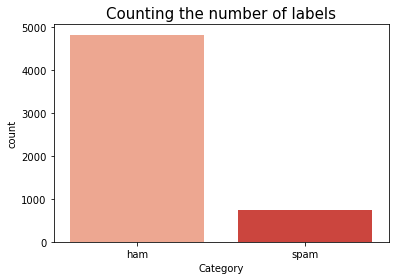

ham     4825
spam     747
Name: Category, dtype: int64


In [31]:
#Graphical Visualisation for counting number of labels.
plt.figure(figsize=(6,4))
sns.countplot(df['Category'],palette= 'Reds')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

print(df.Category.value_counts())

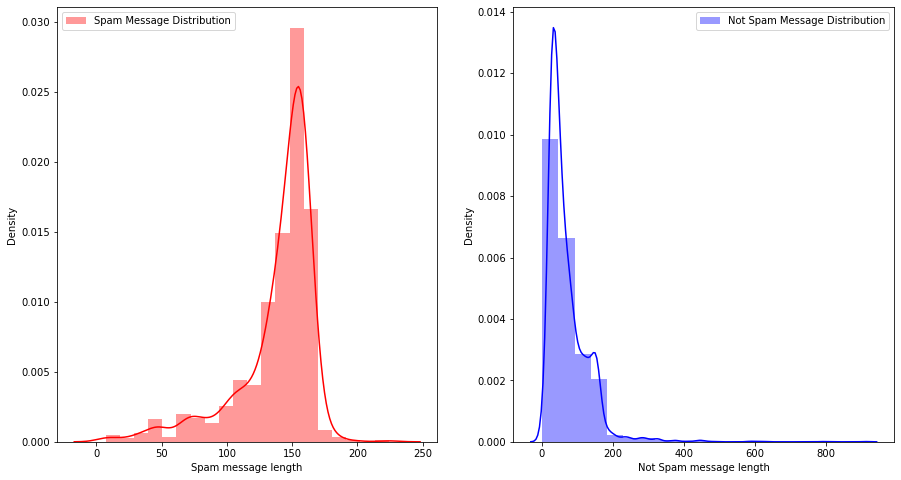

In [32]:
#Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['Category']=='spam']['length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['Category']=='ham']['length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='b')
ax[1].set_xlabel('Not Spam message length')
ax[1].legend()

plt.show()

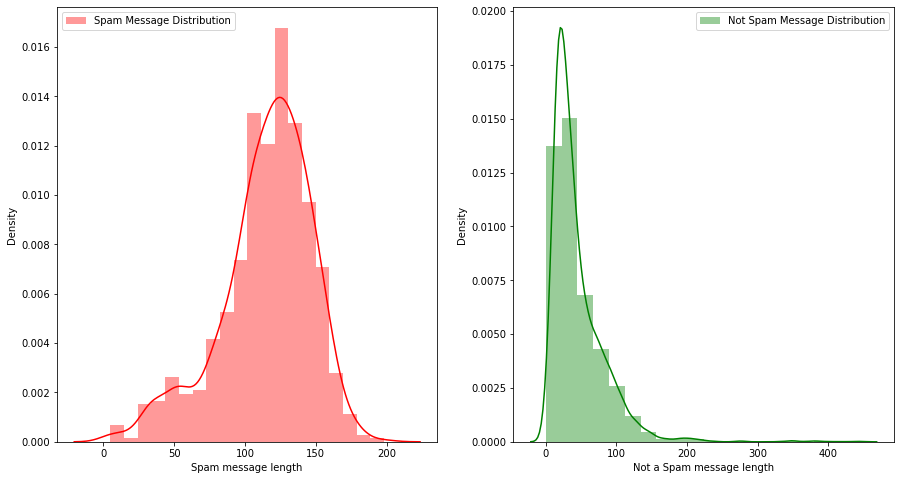

In [33]:
#Message distribution after cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['Category']=='spam']['clean_length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['Category']=='ham']['clean_length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='g')
ax[1].set_xlabel('Not a Spam message length')
ax[1].legend()

plt.show()

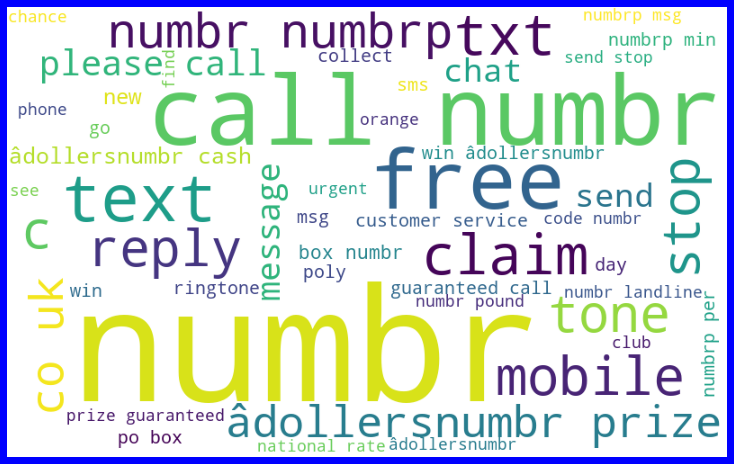

In [34]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['Message'][df['Category']=='spam']

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

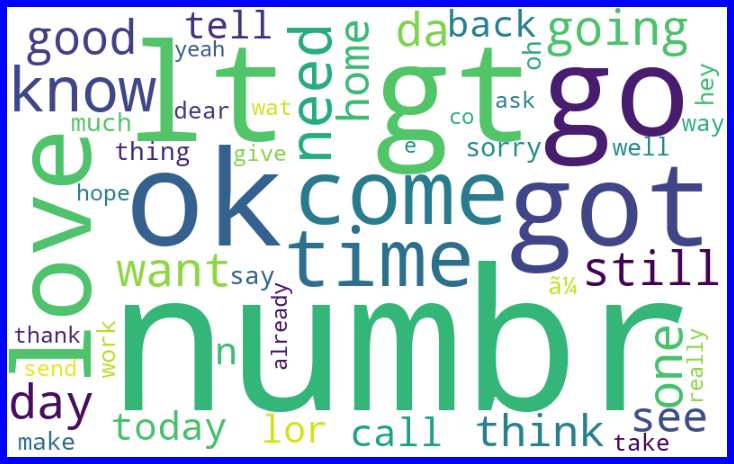

In [35]:
#Getting sense of loud words in not-spam 
from wordcloud import WordCloud

not_spams = df['Message'][df['Category']=='ham']

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Converting the text into vectors using TF-IDF**

In [36]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label


tf_vec = TfidfVectorizer()

#naive = MultinomialNB()

SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

features = tf_vec.fit_transform(df['Message'])

X = features
y = df['Category']

In [37]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)         #test_size=0.20 random_state=42 test_size=0.15

#naive.fit(X_train,Y_train)
#y_pred= naive.predict(x_test)

SVM.fit(X_train,Y_train)
y_pred = SVM.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9842067480258435


In [38]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [39]:
# Checking Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       0.98      0.90      0.94       186

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



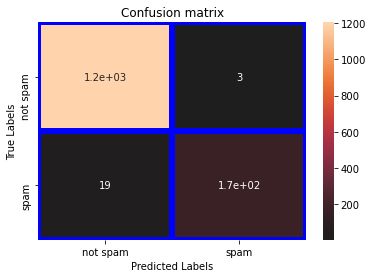

In [40]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='b',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

Observation: 
    In naive_bayes the accuracy score was in between 99% in SVM the accuracy score is around 98%.

**From both models we see naive_bayes performs better than SVM **

**Saving SVM as our final model**.

In [41]:
#We see naive_bayes to perform the best.
#save the best model.
import pickle
filename='Email_spam_detect.pkl'
M=open(filename,'wb')
pickle.dump(SVM,M)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
M.close()